In [1]:
import datetime
import json
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np



dataset_file_path = "../data/dados_2014-2022.csv"
dataset = pd.read_csv(dataset_file_path, index_col=0)

dataset_original = dataset.copy()
folder_figures = "../plots/"

columns_Y = ["UpwardUsedSecondaryReserveEnergy", "DownwardUsedSecondaryReserveEnergy"]
y_columns = columns_Y
datetime_col = "datetime"


d = pd.to_datetime(dataset[datetime_col], format="mixed", utc=True)
columns_X = dataset.columns[~dataset.columns.isin(columns_Y)]



In [2]:
# Zero its is own class, we just want to study the others.
data = dataset[columns_Y][dataset[y_columns]!=0].copy()
data.dropna(how="any", inplace=True)


In [3]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt



study_dicy = {}

for col in columns_Y:
    study_data  = data[col].values.reshape(-1,1)
    n_components = np.arange(2, 25)
    aic_values = []
    bic_values = []
    sil_scores = []
    
    for n in n_components:
        gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=0)
        gmm.fit(study_data)
        labels = gmm.predict(study_data)
        aic_values.append(gmm.aic(study_data))
        bic_values.append(gmm.bic(study_data))
        sil_scores.append(silhouette_score(study_data, labels))
    study_dicy[col]={
        "aic_values":aic_values,
        "bic_values" :bic_values,
        "sil_scores" :sil_scores,
        
    }




In [19]:
from sklearn.cluster import KMeans

for col in columns_Y:
    study_data  = data[col].values.reshape(-1,1)
    n_components = np.arange(2, 25)

    inertia = []
    for n in n_components:
        # K-means
        kmeans = KMeans(n_clusters=n, random_state=0)
        kmeans.fit(study_data)
        inertia.append(kmeans.inertia_)

    study_dicy[col]["inertia"]=inertia

/home/joao/.virtualenvs/tese_cpu/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/joao/.virtualenvs/tese_cpu/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/joao/.virtualenvs/tese_cpu/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/joao/.virtualenvs/tese_cpu/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defa

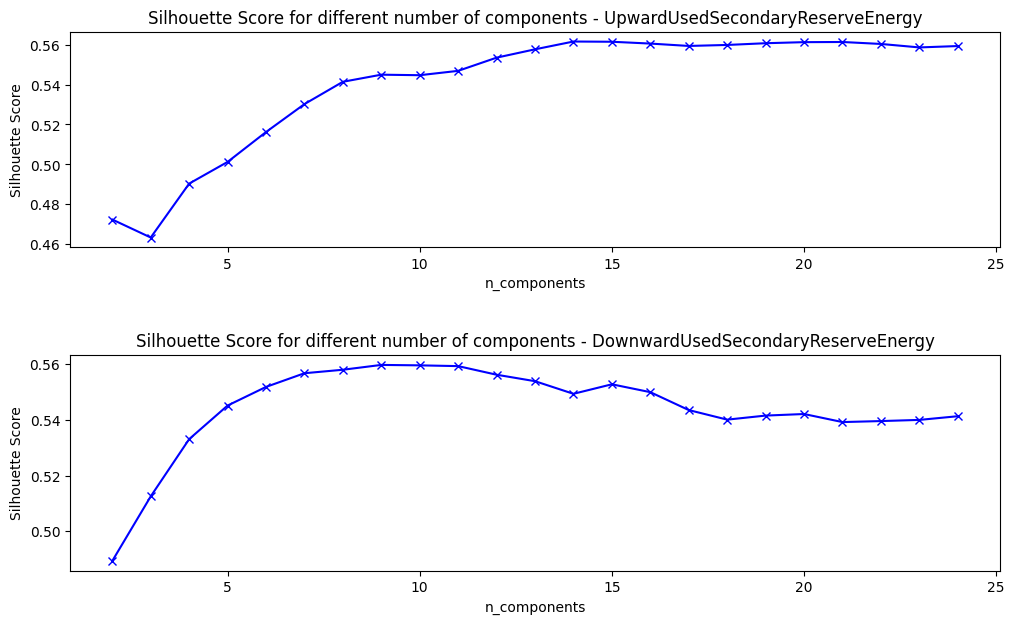

In [17]:
nrows = 2
ncols = 1
fig, axis = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 7))

# Adjust the vertical spacing here
plt.subplots_adjust(hspace = 0.5)


for i,col in enumerate(columns_Y):
    #aic_values = study_dicy[col]["aic_values"]
    #bic_values = study_dicy[col]["bic_values"]
    sil_scores = study_dicy[col]["sil_scores"]

    # Plotting Silhouette scores
    axis[i].plot(n_components, sil_scores, 'bx-')
    axis[i].set_xlabel('n_components')
    axis[i].set_ylabel('Silhouette Score')
    axis[i].set_title(f'Silhouette Score for different number of components - {col}')
    


figure_name = "silhouette_score.png"

plt.savefig(os.path.join(folder_figures, figure_name))


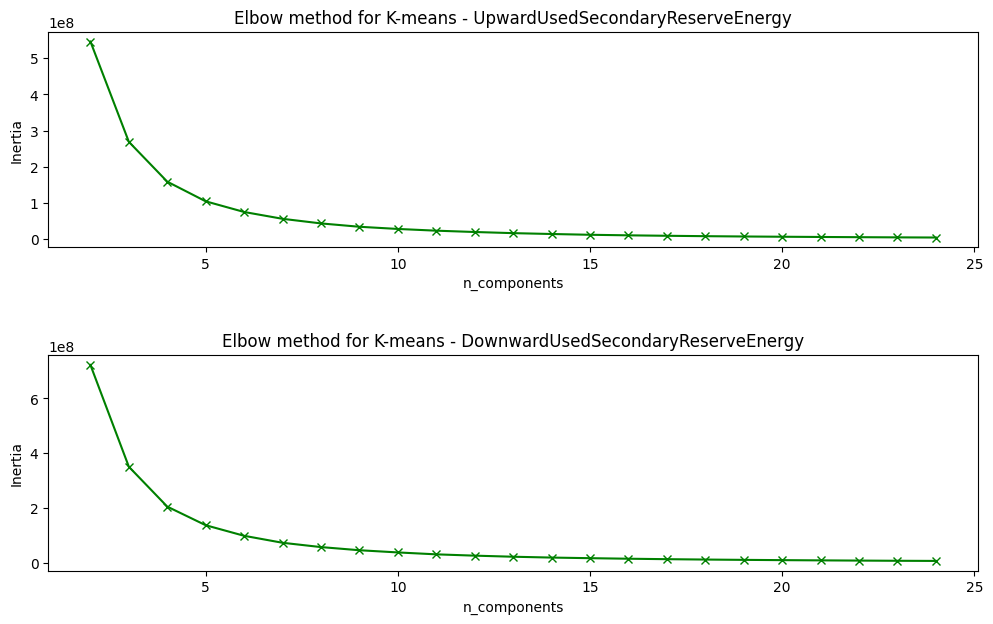

In [20]:
nrows = 2
ncols = 1
fig, axis = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 7))

# Adjust the vertical spacing here
plt.subplots_adjust(hspace = 0.5)


for i,col in enumerate(columns_Y):
    inertia = study_dicy[col]["inertia"]

    # Plotting Silhouette scores
    axis[i].plot(n_components, inertia, 'gx-')
    axis[i].set_xlabel('n_components')
    axis[i].set_ylabel('Inertia')
    axis[i].set_title(f'Elbow method for K-means - {col}')
    


figure_name = "elbow_test.png"

plt.savefig(os.path.join(folder_figures, figure_name))



In [21]:
for col in columns_Y:
    sil_scores = study_dicy[col]["sil_scores"]
    best_number_clusters = np.argmax(sil_scores) + 2
    print(f"In {col} the best number of cluster is: {best_number_clusters}")


In UpwardUsedSecondaryReserveEnergy the best number of cluster is: 14
In DownwardUsedSecondaryReserveEnergy the best number of cluster is: 9


/home/joao/.virtualenvs/tese_cpu/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/joao/.virtualenvs/tese_cpu/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/joao/.virtualenvs/tese_cpu/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/joao/.virtualenvs/tese_cpu/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future versi

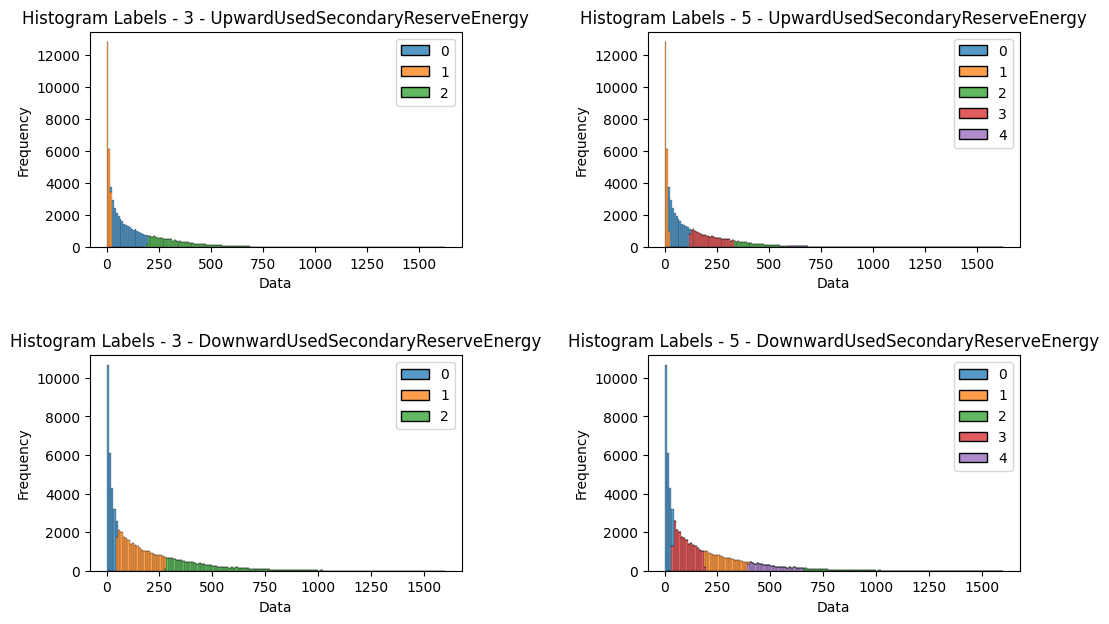

In [31]:
import seaborn as sns


nrows = 2
ncols = 2
fig, axis = plt.subplots(nrows=nrows, ncols=ncols,figsize=(12, 7)
                        )

for i,col in enumerate(columns_Y):
    study_data  = data[col].values.reshape(-1,1)
    
    for f, best_number_clusters in enumerate([3, 5]):
    
        
        # Create a GMM instance with 3 components
        gmm = GaussianMixture(n_components=best_number_clusters, covariance_type='full', random_state=0)
        
        # Fit the model to the data
        gmm.fit(study_data)
        
        # Predict the cluster labels
        labels = gmm.predict(study_data)
        study_dicy[col][f"labels_{best_number_clusters}"] = labels
    
    
        

        
        # Adjust the vertical spacing here
        plt.subplots_adjust(hspace = 0.5, wspace=0.5)
        
        
        
        
        # Create a histogram with colored bars
        sns.histplot(x=study_data.ravel(), hue=labels, multiple='stack', palette='tab10', ax=axis[i][f])
        
    
        axis[i][f].set_xlabel('Data')
        axis[i][f].set_ylabel('Frequency')
        axis[i][f].set_title(f'Histogram Labels - {best_number_clusters} - {col}')






figure_name = "clusters_histogram.png"

plt.savefig(os.path.join(folder_figures, figure_name))






In [71]:
cluster_limits = {}
cluster_limits_d = {}
for i,col in enumerate(columns_Y):
    study_data  = data[col].values.reshape(-1,1)
    for f, best_number_clusters in enumerate([3, 5]):
    
        
        df = pd.DataFrame({"data":study_data.ravel(),"labels":study_dicy[col][f"labels_{best_number_clusters}"]})
        
        label_dict = {}
        uniq_values =np.unique(study_dicy[col][f"labels_{best_number_clusters}"])
        uniq_values.sort()
        
        dict_key = {}
        sorted_uniq_valuesa=[]
        for l,label in enumerate(uniq_values):
            data_in_label = df[df["labels"]==label]["data"]
            max_val = max(data_in_label)
            dict_key[max_val]=l
        for key in sorted(dict_key):
            sorted_uniq_valuesa.append(dict_key[key])
        
        for l,label in enumerate(sorted_uniq_valuesa):
            data_in_label = df[df["labels"]==label]["data"]
            max_in_label = max(data_in_label)
            min_in_label = min(data_in_label)
            label_dict[l+1]=[min_in_label, max_in_label]
        cluster_limits[f"{col}_{best_number_clusters}"] = label_dict
        if col not in cluster_limits_d:
            cluster_limits_d[f"{col}"] = {}
        cluster_limits_d[f"{col}"][best_number_clusters] = label_dict

        print(f"The limits for each cluster for {col} are:")
        print(label_dict)

The limits for each cluster for UpwardUsedSecondaryReserveEnergy are:
{1: [0.1, 26.2], 2: [26.3, 194.9], 3: [195.0, 1621.6]}
The limits for each cluster for UpwardUsedSecondaryReserveEnergy are:
{1: [0.1, 20.2], 2: [20.3, 119.2], 3: [119.3, 331.9], 4: [332.0, 592.6], 5: [592.7, 1621.6]}
The limits for each cluster for DownwardUsedSecondaryReserveEnergy are:
{1: [0.1, 47.0], 2: [47.1, 281.9], 3: [282.0, 1599.5]}
The limits for each cluster for DownwardUsedSecondaryReserveEnergy are:
{1: [0.1, 38.9], 2: [39.0, 186.9], 3: [187.0, 393.1], 4: [393.2, 658.0], 5: [658.2, 1599.5]}


In [72]:
for key in cluster_limits:
    for keyone in cluster_limits[key]:
        if keyone==1:
            cluster_limits[key][keyone] = [cluster_limits[key][keyone][-1]]
        elif keyone==max(cluster_limits[key].keys()):
            cluster_limits[key][keyone] = [cluster_limits[key][keyone][0]]


In [73]:
cluster_limits

{'UpwardUsedSecondaryReserveEnergy_3': {1: [26.2],
  2: [26.3, 194.9],
  3: [195.0]},
 'UpwardUsedSecondaryReserveEnergy_5': {1: [20.2],
  2: [20.3, 119.2],
  3: [119.3, 331.9],
  4: [332.0, 592.6],
  5: [592.7]},
 'DownwardUsedSecondaryReserveEnergy_3': {1: [47.0],
  2: [47.1, 281.9],
  3: [282.0]},
 'DownwardUsedSecondaryReserveEnergy_5': {1: [38.9],
  2: [39.0, 186.9],
  3: [187.0, 393.1],
  4: [393.2, 658.0],
  5: [658.2]}}

In [74]:
cluster_limits_d

{'UpwardUsedSecondaryReserveEnergy': {3: {1: [26.2],
   2: [26.3, 194.9],
   3: [195.0]},
  5: {1: [20.2],
   2: [20.3, 119.2],
   3: [119.3, 331.9],
   4: [332.0, 592.6],
   5: [592.7]}},
 'DownwardUsedSecondaryReserveEnergy': {3: {1: [47.0],
   2: [47.1, 281.9],
   3: [282.0]},
  5: {1: [38.9],
   2: [39.0, 186.9],
   3: [187.0, 393.1],
   4: [393.2, 658.0],
   5: [658.2]}}}

In [57]:
with open("../data/cluster_limits.json", "w") as mfile:
    json.dump(cluster_limits, mfile)


In [66]:

# Flatten the data
flattened_data = [(outerKey, innerKey, value) for outerKey, innerDict in cluster_limits_d.items() for innerKey, values in innerDict.items() for value in values]

# Convert to DataFrame
df = pd.DataFrame(flattened_data, columns=['Category', 'Key', 'Class'])

print(df)

                              Category  Key  Value
0     UpwardUsedSecondaryReserveEnergy    3      1
1     UpwardUsedSecondaryReserveEnergy    3      2
2     UpwardUsedSecondaryReserveEnergy    3      3
3     UpwardUsedSecondaryReserveEnergy    5      1
4     UpwardUsedSecondaryReserveEnergy    5      2
5     UpwardUsedSecondaryReserveEnergy    5      3
6     UpwardUsedSecondaryReserveEnergy    5      4
7     UpwardUsedSecondaryReserveEnergy    5      5
8   DownwardUsedSecondaryReserveEnergy    3      1
9   DownwardUsedSecondaryReserveEnergy    3      2
10  DownwardUsedSecondaryReserveEnergy    3      3
11  DownwardUsedSecondaryReserveEnergy    5      1
12  DownwardUsedSecondaryReserveEnergy    5      2
13  DownwardUsedSecondaryReserveEnergy    5      3
14  DownwardUsedSecondaryReserveEnergy    5      4
15  DownwardUsedSecondaryReserveEnergy    5      5


In [75]:
data_rows = []

for category, subcategory_dict in cluster_limits_d.items():
    for subcategory, key_dict in subcategory_dict.items():
        row = {"Atributo": category, "Nº Clusters": subcategory}
        for key, values in key_dict.items():
            row[f"Classe {key}"] = values
        data_rows.append(row)

df = pd.DataFrame(data_rows)

# Fill missing values with np.nan
df = df.fillna(np.nan)

print(df)


                             Atributo  Nº Clusters Classe 1       Classe 2  \
0    UpwardUsedSecondaryReserveEnergy            3   [26.2]  [26.3, 194.9]   
1    UpwardUsedSecondaryReserveEnergy            5   [20.2]  [20.3, 119.2]   
2  DownwardUsedSecondaryReserveEnergy            3   [47.0]  [47.1, 281.9]   
3  DownwardUsedSecondaryReserveEnergy            5   [38.9]  [39.0, 186.9]   

         Classe 3        Classe 4 Classe 5  
0         [195.0]             NaN      NaN  
1  [119.3, 331.9]  [332.0, 592.6]  [592.7]  
2         [282.0]             NaN      NaN  
3  [187.0, 393.1]  [393.2, 658.0]  [658.2]  


In [76]:
df.to_csv("../data/cluster_limits.csv", index=False)